<a href="https://colab.research.google.com/github/70shakeel/DecisionTreeAssignment/blob/master/Classification_on_MNIST_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Libraries that will be used 

In [0]:
from sklearn.datasets import fetch_openml
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns; sns.set()
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from skimage.transform import pyramid_gaussian
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

## Fetching MNISH DATA

In [0]:
mnist = fetch_openml('mnist_784')

## X will have the values of images and Y will have the labels.

In [0]:
x, y = mnist['data'], mnist['target']

In [63]:
x.shape

(70000, 784)

In [64]:
y.shape

(70000,)

In [0]:
%matplotlib inline

##  Taking a random digit to plot

In [0]:
some_digit = x[675]
some_digit_image = some_digit.reshape(28, 28) # lets reshape it to plot it

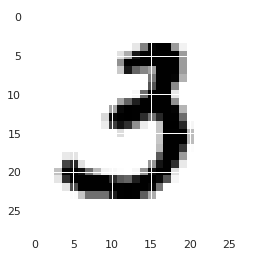

In [67]:
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")


## Label for radom digit from MNIST Dataset

In [68]:
y[675]

'3'

## Splitting data into Training and Testing Parts

In [0]:
x_train, x_test = x[0:60000], x[60000:70000]

In [0]:
y_train, y_test = y[0:60000], y[60000:70000]

In [0]:

shuffle_index = np.random.permutation(60000)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

Converting values into integers

In [0]:
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)

In [73]:
y_train

array([6, 9, 8, ..., 6, 2, 0], dtype=int8)

## Decision Tree Classifier from SK Learn

In [0]:
clf = DecisionTreeClassifier().fit(x_train,y_train)

## Implementiong Decision Tree Classifier on our Dataset and Calculating accuracy between predicted and test values and plotting them in Confusion Matrix.

[7 2 1 0 4 1 4 7 6 9 0 6 9 0 1 5 9 7 6 4] .....
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4] .....
0.8774


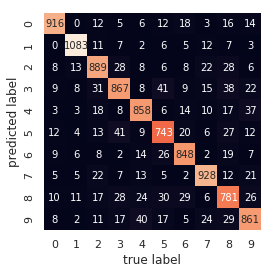

In [75]:
y_pred = clf.predict(x_test)
print(y_pred[0:20], ".....")
print(y_test[0:20], ".....")
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

## Naive Bayes Classifier from SK Learn

Implementing Naive Bayes Classifier and Checking Accuracy of Predicted and Test Values and plotting them in Confusion Matrix.

0.5558


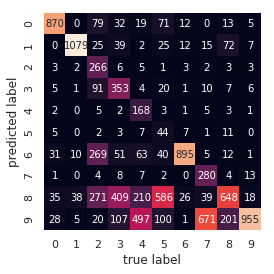

In [76]:
model = GaussianNB()

model.fit(x_train, y_train)

yhat = model.predict(x_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, yhat))

mat = confusion_matrix(y_test, yhat)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');



## Conclusion

As we see, according to the accuracy given by Decision Tree Classifier is more than Naive Bayes and Confusion Matrix also reflects the same results. We can conclude that on MNIST dataset, Decision Tree is more accurate and hence should be preffered.